In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

from ydata_profiling import ProfileReport

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

# your code that triggers the warning goes here

pd.options.mode.chained_assignment = 'warn'  # set it back to the default value

In [2]:
 
# Specifying data types for columns while reading a CSV file
dtype_dict = {
    "number": "str",
    "closed": "str", 
    "case": "str",
    "description": "str",
    "case_type": "category",
    "due_date": "str", 
    "first_response_time": "str", 
    "opened": "str",  
    "account": "category",
    "contact": "category",
    "created_by": "category",
    "business_service": "category",
    "business_service_activity": "category",
    "assigned_to": "category",
    "assignment_group": "category",
    "auto_close": "category",
    "time_worked": "float",
    "reassignment_count": "int",
    "impact": "category",
    "priority": "category",
    "urgency": "category",
    "escalation": "category",
    "comments": "str",
    "case_cause": "category",
    "cause": "str",
    "close_notes": "str",
    "resolution_code": "category",
    "problem": "category",
    "business_percentage": "float",
    "sla_has_breached": "category",
    "duration": "float",
    "openedToClosed": "float",
    "created_by_group": "category"
}

# read csv file into dataframe
df = pd.read_csv('Data/data_new.csv', dtype = dtype_dict)

# print shape of dataframe 
print(df.shape)
print(df.columns)
display(df)

(17883, 22)
Index(['number', 'account', 'created_by_group', 'business_service',
       'assignment_group', 'auto_close', 'impact', 'priority', 'urgency',
       'sla_has_breached', 'case_cause', 'resolution_code',
       'reassignment_count', 'time_worked', 'opened', 'closed',
       'openedToClosed', 'business_percentage', 'sys_id', 'description',
       'cause', 'close_notes'],
      dtype='object')


,number,account,created_by_group,business_service,assignment_group,auto_close,impact,priority,urgency,sla_has_breached,...,reassignment_count,time_worked,opened,closed,openedToClosed,business_percentage,sys_id,description,cause,close_notes
0,CS0011292,Mercy Ships Switzerland,Unico,Hosted Desktop,Squad Platform,TRUE,1 - High,2 - High,2 - Medium,TRUE,...,1,0.0,2020-01-08 05:43:52,2020-04-14 08:19:34,1342.584639,290.518,dda37cd8db5ec8945ca8199f29961924,Testfeedback von Christophe Baer bzgl. VDI Tes...,NaN,Performance-Probleme wurden durch damaligen Um...
1,CS0011381,Saphir Group Networks AG,Unico,Managed Workplace,Service Desk 1st Level,TRUE,3 - Low,4 - Low,2 - Medium,TRUE,...,2,0.0,2020-01-09 15:32:00,2020-05-18 19:10:46,1342.584639,105.620,1ed340b41b92c0945fbf1028bd4bcb54,Hallo Nathanael\r\n\r\nNur so zur Info mein No...,Workaround mit Windows Energy Einstellungen (K...,Workaround mit Windows Energy Einstellungen (K...
2,CS0011489,Amstutz Greuter Rechtsanwälte,Unico,No Business Service - only best effort service,Service Desk 1st Level,TRUE,3 - Low,4 - Low,2 - Medium,TRUE,...,0,8640.0,2020-01-13 11:31:44,2020-06-01 10:30:03,1342.584639,290.518,ca333bb91b9ec8945fbf1028bd4bcb7a,NaN,Garantiefall,Das Gerät wurde an den Kunden zurückgesendet
3,CS0011690,GASSMANN Rechtsanwälte AG,Unico,Hosted Desktop,Service Desk 1st Level,TRUE,3 - Low,5 - Planning,3 - Low,TRUE,...,0,0.0,2020-01-16 08:19:12,2020-08-19 10:30:06,1342.584639,290.518,03e32a3a1bda84d45fbf1028bd4bcb5e,Suche in Archive -> Erweiterte Suche -> Archi...,NaN,Archiv wie gewünscht konfiguriert
4,CS0011758,Saphir Group Networks AG,Unico,Enterprise Agreement Service,IT Operations,FALSE,2 - Medium,3 - Moderate,2 - Medium,TRUE,...,0,900.0,2020-01-17 17:06:50,2020-04-30 07:55:15,1342.584639,290.518,3946211bdb9a4cd45ca8199f2996195e,Hallo IT Operations\r\nDarf ich euch bitten fo...,Zu wenig gigafähige Switches vorhanden (Nur 1 ...,Aktuell gibt es nur einen POE fähigen Switch w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17878,CS0076822,PB Swiss Tools,Unico,Session freigeben in Hosted Desktop,Service Desk 1st Level,TRUE,2 - Medium,3 - Moderate,2 - Medium,FALSE,...,0,900.0,2024-02-12 06:06:02,2024-02-19 22:30:10,184.402222,1.800,902341bd1b1882d09b1a86a5604bcb17,NaN,"blockierte Session auf dem Server Staus ""Loggi...",Session auf dem Server geschlossen - danach ka...
17879,CS0076830,Siloah AG,User,Print Management,Vorortsupport Siloah,TRUE,3 - Low,4 - Low,2 - Medium,FALSE,...,1,1440.0,2024-02-12 08:02:34,2024-02-19 22:30:12,182.460556,1.620,2a6dd5fd97544ed0b84fbefce053afac,...und bittet um Servicemitarbeiter. Merci für...,unbekannt,Faigle Techniker hat das Problem behoben
17880,CS0076848,Siloah AG,Unico,Clientmanagement,Vorortsupport Siloah,TRUE,2 - Medium,3 - Moderate,2 - Medium,FALSE,...,0,3960.0,2024-02-12 12:20:59,2024-02-20 22:30:06,202.151944,1.150,a4f812f597dc4ed0b84fbefce053af6d,Starten von der VDI Nicht,Citrix Programm fehler,Programm deinstalliert und wieder Installiert
17881,CS0076849,Siloah AG,Unico,Applikationsstörung (Standard Applikation) beh...,Service Desk 1st Level,TRUE,2 - Medium,3 - Moderate,2 - Medium,FALSE,...,0,720.0,2024-02-12 13:08:42,2024-02-19 22:30:14,177.358889,0.040,e7d3e2f51b18c2d09b1a86a5604bcb01,Nach dem Beheben von Outlookprobleme fehlte de...,Wurde beim vorderen Case nicht wieder verknüpf...,Archivorder aus dem Laufwerk H:\Outlook ordner...


In [3]:
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_notebook_iframe()
# profile.to_file(f"./html/Profiling Report Overall.html")

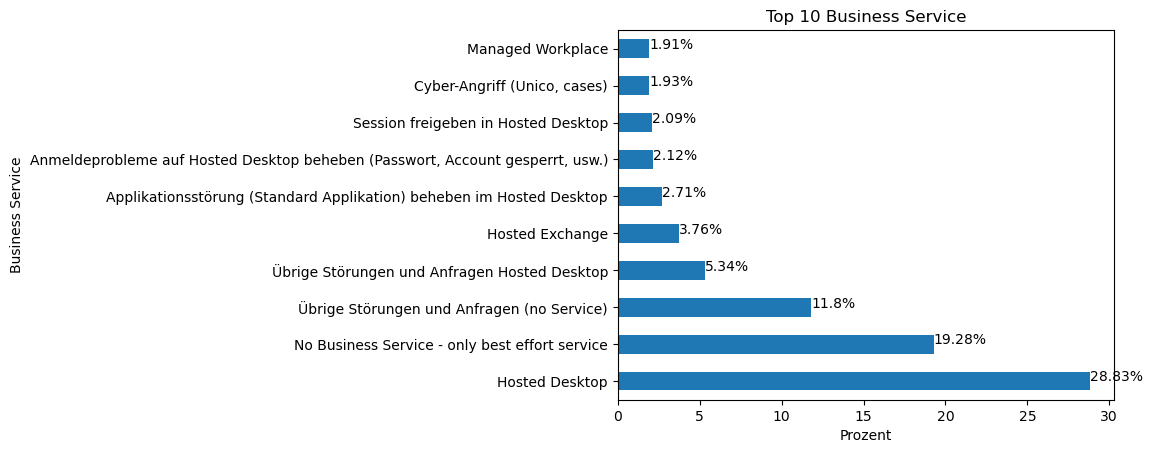

In [4]:
(df["business_service"].value_counts() / len(df) * 100).head(10).plot(kind = "barh")
# add procent value to bar
for index, value in enumerate((df["business_service"].value_counts() / len(df) * 100).head(10)):
    plt.text(value, index, str(round(value, 2)) + '%')
plt.title("Top 10 Business Service")
plt.xlabel("Prozent")
plt.ylabel("Business Service")
plt.show()

In [13]:
# displau Short Description (case), Description, Cause and close_notes
df_text = df[['number', 'description', 'cause', 'close_notes']]

# preprocess df_text columns 

display(df_text)

,number,description,cause,close_notes
0,CS0011292,Testfeedback von Christophe Baer bzgl. VDI Tes...,NaN,Performance-Probleme wurden durch damaligen Um...
1,CS0011381,Hallo Nathanael\r\n\r\nNur so zur Info mein No...,Workaround mit Windows Energy Einstellungen (K...,Workaround mit Windows Energy Einstellungen (K...
2,CS0011489,NaN,Garantiefall,Das Gerät wurde an den Kunden zurückgesendet
3,CS0011690,Suche in Archive -> Erweiterte Suche -> Archi...,NaN,Archiv wie gewünscht konfiguriert
4,CS0011758,Hallo IT Operations\r\nDarf ich euch bitten fo...,Zu wenig gigafähige Switches vorhanden (Nur 1 ...,Aktuell gibt es nur einen POE fähigen Switch w...
...,...,...,...,...
17878,CS0076822,NaN,"blockierte Session auf dem Server Staus ""Loggi...",Session auf dem Server geschlossen - danach ka...
17879,CS0076830,...und bittet um Servicemitarbeiter. Merci für...,unbekannt,Faigle Techniker hat das Problem behoben
17880,CS0076848,Starten von der VDI Nicht,Citrix Programm fehler,Programm deinstalliert und wieder Installiert
17881,CS0076849,Nach dem Beheben von Outlookprobleme fehlte de...,Wurde beim vorderen Case nicht wieder verknüpf...,Archivorder aus dem Laufwerk H:\Outlook ordner...


In [14]:
def process_captions(data, column):
    data[column] = data[column].apply(lambda x: x.replace('\n', ' '))
    data[column] = data[column].apply(lambda x: x.replace('-', ' '))
    data[column] = data[column].apply(lambda x: x.lower())
    data[column] = data[column].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', ' ', x))
    return data[column]

# change datatype of columns to string
df_text['description'] = df_text['description'].astype(str).copy()
df_text['cause'] = df_text['cause'].astype(str).copy()
df_text['close_notes'] = df_text['close_notes'].astype(str).copy()

df_text['description'] = process_captions(df_text, 'description').copy()
df_text['cause'] = process_captions(df_text, 'cause').copy()
df_text['close_notes'] = process_captions(df_text, 'close_notes').copy()

display(df_text)

C:\Users\Student\AppData\Local\Temp\ipykernel_8560\2137834646.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['description'] = df_text['description'].astype(str).copy()
C:\Users\Student\AppData\Local\Temp\ipykernel_8560\2137834646.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['cause'] = df_text['cause'].astype(str).copy()
C:\Users\Student\AppData\Local\Temp\ipykernel_8560\2137834646.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,number,description,cause,close_notes
0,CS0011292,testfeedback von christophe baer bzgl vdi tes...,nan,performance probleme wurden durch damaligen um...
1,CS0011381,hallo nathanael\r \r nur so zur info mein note...,workaround mit windows energy einstellungen k...,workaround mit windows energy einstellungen k...
2,CS0011489,nan,garantiefall,das ger t wurde an den kunden zur ckgesendet
3,CS0011690,suche in archive erweiterte suche archi...,nan,archiv wie gew nscht konfiguriert
4,CS0011758,hallo it operations\r darf ich euch bitten fol...,zu wenig gigaf hige switches vorhanden nur 1 ...,aktuell gibt es nur einen poe f higen switch w...
...,...,...,...,...
17878,CS0076822,nan,blockierte session auf dem server staus loggi...,session auf dem server geschlossen danach ka...
17879,CS0076830,und bittet um servicemitarbeiter merci f r...,unbekannt,faigle techniker hat das problem behoben
17880,CS0076848,starten von der vdi nicht,citrix programm fehler,programm deinstalliert und wieder installiert
17881,CS0076849,nach dem beheben von outlookprobleme fehlte de...,wurde beim vorderen case nicht wieder verkn pf...,archivorder aus dem laufwerk h outlook ordner...


In [18]:
import requests

stopwords = requests.get("https://raw.githubusercontent.com/stopwords-iso/stopwords-de/master/stopwords-de.txt").text.split("\n")
# Add common words to stopwords
stopwords.extend(["nan", "frau", "herr", "ch", "bitte", "st"])
from sklearn.feature_extraction.text import TfidfVectorizer

# Create empty df to store the top 50 words for each column
top_50_words = pd.DataFrame()

for column in df_text.columns[1:]:
    tfidf = TfidfVectorizer(stop_words=stopwords)
    text = tfidf.fit_transform(df_text[column])

    VectorizedText = pd.DataFrame(text.toarray(), columns=tfidf.get_feature_names_out())
    # Add to all columns the column name
    VectorizedText.columns = [column + "_" + col for col in VectorizedText.columns]
    column_sums = VectorizedText.sum(axis=0).sort_values(ascending=False)

    # Select the names of the top 50 columns with the highest sums
    top_50_columns = column_sums.head(25).index
    top_50_words[column] = top_50_columns

    # Subset the original DataFrame to keep only these top 50 columns
    minimized_df = VectorizedText[top_50_columns]

    # Add from the original df the column number to the minimized_df at first position
    minimized_df.insert(0, 'number', df_text['number'])

    # save minimized_df to csv
    minimized_df.to_csv('Data/VectorizedText_' + column + '.csv', index=False)